# Data Importing

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Processes to reduce memory usage

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [3]:
def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True, low_memory=False)
    df = reduce_mem_usage(df)

    return df

In [4]:
filenames = ["train_all.csv", "test_all.csv"]
for filename in filenames:
    print(filename)
    import_data(filename)
    print('---------------------------------------------')

train_all.csv
Memory usage of dataframe is 2459.86 MB
Memory usage after optimization is: 685.90 MB
Decreased by 72.1%
---------------------------------------------
test_all.csv
Memory usage of dataframe is 112.10 MB
Memory usage after optimization is: 34.91 MB
Decreased by 68.9%
---------------------------------------------


In [5]:
df = import_data("train_all.csv")
df.head()

Memory usage of dataframe is 2459.86 MB
Memory usage after optimization is: 685.90 MB
Decreased by 72.1%


,is_elite_user,original_price,discounted_price,ship_cost,coupon_discount,is_wallet_trx,is_saved_card_trx,is_returned,returnRate,total_claim,...,brand_name,gender_id,gender_name,category_id,category_name,color_id,color_name,supplier_color_name,attributet_name,attribute_value
0,0,79.87500,51.93750,8.882812,0.0,0,1.0,0.0,0.098206,16357,...,Slazenger,4296.0,Erkek,604,T-Shirt,7000.0,Beyaz,Beyaz,BEDEN,XL
1,0,60.00000,50.00000,10.671875,0.0,0,1.0,0.0,0.093384,902,...,Ltb,4296.0,Erkek,2949,Polo Yaka T-shirt,7000.0,Gri,GRİ_217,BEDEN,XL
2,0,49.90625,49.90625,10.671875,0.0,0,1.0,0.0,0.108276,227,...,Ltb,4296.0,Erkek,2949,Polo Yaka T-shirt,7008.0,Mor,MOR_11525,BEDEN,XL
3,0,130.00000,59.96875,9.398438,0.0,0,1.0,0.0,0.050751,46699,...,Pierre Cardin,4296.0,Erkek,604,T-Shirt,7012.0,Yeşil,VR079,BEDEN,XL
4,1,90.00000,72.00000,9.398438,0.0,0,0.0,0.0,0.127075,3269293,...,TRENDYOLMİLLA,4296.0,Kadın / Kız,1182,Elbise,7004.0,Mavi,Mavi,BEDEN,40


In [6]:
df.shape

(10702717, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10702717 entries, 0 to 10702716
Data columns (total 31 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   is_elite_user               int8    
 1   original_price              float16 
 2   discounted_price            float16 
 3   ship_cost                   float16 
 4   coupon_discount             float16 
 5   is_wallet_trx               int8    
 6   is_saved_card_trx           float16 
 7   is_returned                 float16 
 8   returnRate                  float16 
 9   total_claim                 int32   
 10  unresolved_claim            int16   
 11  unresolved_accepted_claim   int16   
 12  unresolvedclaim_percentage  float16 
 13  defective_returnRate        float16 
 14  review_rates_mean           float16 
 15  review_rates_min            int8    
 16  review_rates_max            int8    
 17  review_rates_median         float16 
 18  product_id                  int32   
 19

In [8]:
df.isna().sum()

is_elite_user                     0
original_price                    0
discounted_price                  0
ship_cost                     34156
coupon_discount                   0
is_wallet_trx                     0
is_saved_card_trx                 0
is_returned                       0
returnRate                        0
total_claim                       0
unresolved_claim                  0
unresolved_accepted_claim         0
unresolvedclaim_percentage        0
defective_returnRate              0
review_rates_mean                 0
review_rates_min                  0
review_rates_max                  0
review_rates_median               0
product_id                        0
product_name                      0
brand_id                          0
brand_name                        0
gender_id                      6668
gender_name                       0
category_id                       0
category_name                     0
color_id                       4835
color_name                  

In [9]:
df["ship_cost"].fillna(df["ship_cost"].median(), inplace=True)

In [10]:
drop_cols = ["gender_id", "color_id", "supplier_color_name", 'brand_id', 'category_id',"product_id"]


df = df.drop(drop_cols, axis=1)

In [11]:
df.isna().sum()

is_elite_user                    0
original_price                   0
discounted_price                 0
ship_cost                        0
coupon_discount                  0
is_wallet_trx                    0
is_saved_card_trx                0
is_returned                      0
returnRate                       0
total_claim                      0
unresolved_claim                 0
unresolved_accepted_claim        0
unresolvedclaim_percentage       0
defective_returnRate             0
review_rates_mean                0
review_rates_min                 0
review_rates_max                 0
review_rates_median              0
product_name                     0
brand_name                       0
gender_name                      0
category_name                    0
color_name                    4835
attributet_name                  0
attribute_value                  0
dtype: int64

# Exploratory Data Analysis (EDA)

0.0    9341481
1.0    1361236
Name: is_returned, dtype: int64


Text(0.5, 1.0, 'iade edilmiş ürün dağılımı')

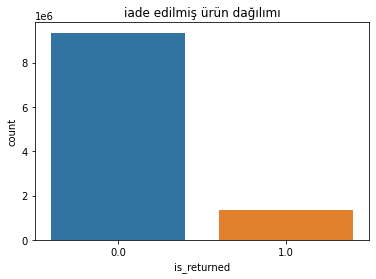

In [12]:
print(df.is_returned.value_counts())

sns.countplot(data=df, x="is_returned")
plt.title('iade edilmiş ürün dağılımı')

### Missing Values

In [13]:
## Here we will check the percentage of nan values present in each feature

## 1 -step make the list of features which has missing values
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

color_name 0.0005  % missing values


### Numerical Features

In [14]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  25


,is_elite_user,original_price,discounted_price,ship_cost,coupon_discount,is_wallet_trx,is_saved_card_trx,is_returned,returnRate,total_claim,...,review_rates_min,review_rates_max,review_rates_median,product_name,brand_name,gender_name,category_name,color_name,attributet_name,attribute_value
0,0,79.87500,51.93750,8.882812,0.0,0,1.0,0.0,0.098206,16357,...,1,5,4.0,Manage Erkek T-shirt Beyaz St11te151,Slazenger,Erkek,T-Shirt,Beyaz,BEDEN,XL
1,0,60.00000,50.00000,10.671875,0.0,0,1.0,0.0,0.093384,902,...,0,0,0.0,Erkek MIGAYA 012208415760890000,Ltb,Erkek,Polo Yaka T-shirt,Gri,BEDEN,XL
2,0,49.90625,49.90625,10.671875,0.0,0,1.0,0.0,0.108276,227,...,0,0,0.0,Erkek MICAFO 012208418960890000,Ltb,Erkek,Polo Yaka T-shirt,Mor,BEDEN,XL
3,0,130.00000,59.96875,9.398438,0.0,0,1.0,0.0,0.050751,46699,...,1,5,5.0,Erkek Koyu Yeşil Slim Fit V Yaka T-Shirt,Pierre Cardin,Erkek,T-Shirt,Yeşil,BEDEN,XL
4,1,90.00000,72.00000,9.398438,0.0,0,0.0,0.0,0.127075,3269293,...,2,5,5.0,Mavi Leopar Desenli Dokuma Elbise THMSS21EL3385,TRENDYOLMİLLA,Kadın / Kız,Elbise,Mavi,BEDEN,40


#### Discrete Variables

In [15]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
#print(discrete_feature)
discrete_feature

Discrete Variables Count: 10


['is_elite_user',
 'is_wallet_trx',
 'is_saved_card_trx',
 'is_returned',
 'review_rates_min',
 'review_rates_max',
 'review_rates_median',
 'gender_name',
 'color_name',
 'attributet_name']

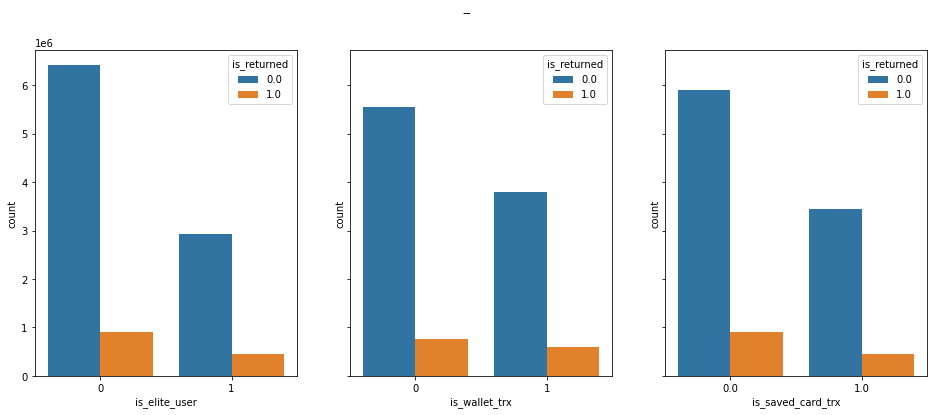

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6), sharey=True)
fig.suptitle('--')

sns.countplot(data=df, x="is_elite_user", hue="is_returned", ax=ax[0])
sns.countplot(data=df, x="is_wallet_trx", hue="is_returned", ax=ax[1])
sns.countplot(data=df, x="is_saved_card_trx", hue="is_returned", ax=ax[2])


fig.show()

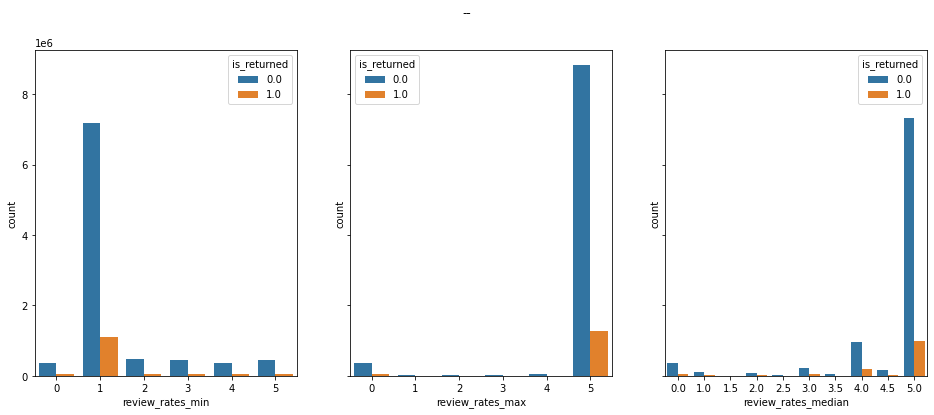

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6), sharey=True)
fig.suptitle('--')

sns.countplot(data=df, x="review_rates_min", hue="is_returned", ax=ax[0])
sns.countplot(data=df, x="review_rates_max", hue="is_returned", ax=ax[1])
sns.countplot(data=df, x="review_rates_median", hue="is_returned", ax=ax[2])

fig.show()

#### Continuous Variables

In [18]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous feature Count 15


['original_price',
 'discounted_price',
 'ship_cost',
 'coupon_discount',
 'returnRate',
 'total_claim',
 'unresolved_claim',
 'unresolved_accepted_claim',
 'unresolvedclaim_percentage',
 'defective_returnRate',
 'review_rates_mean',
 'product_name',
 'brand_name',
 'category_name',
 'attribute_value']

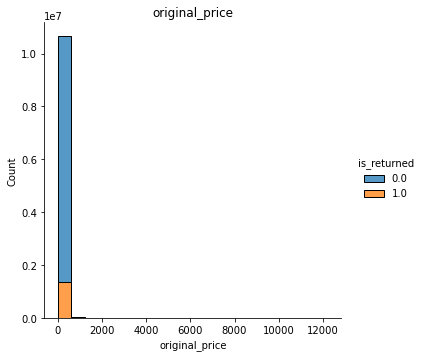

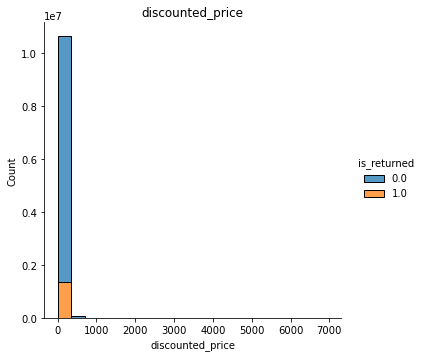

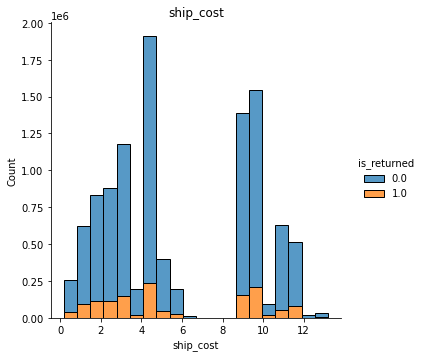

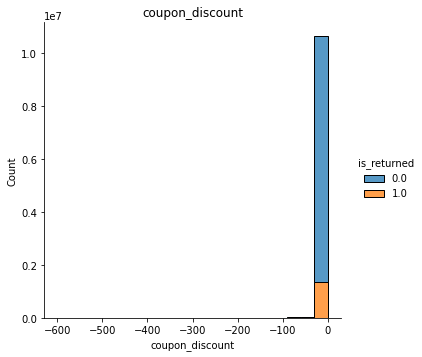

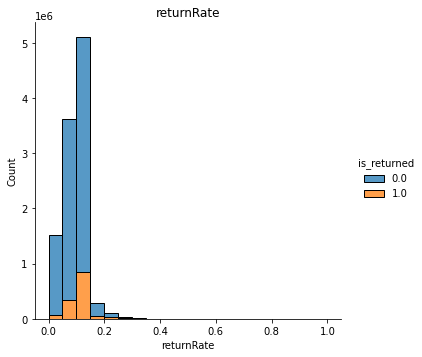

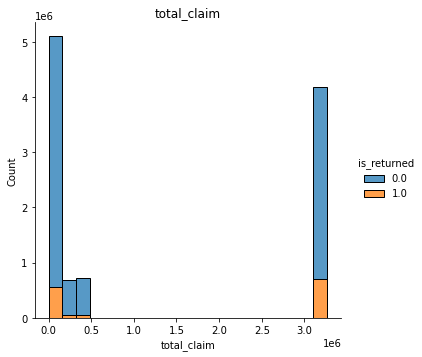

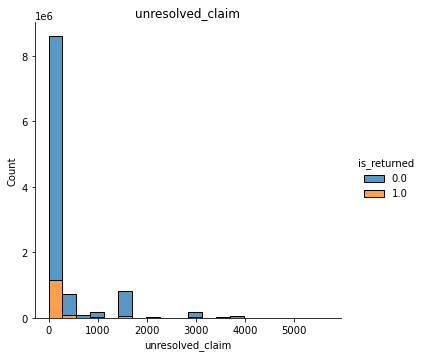

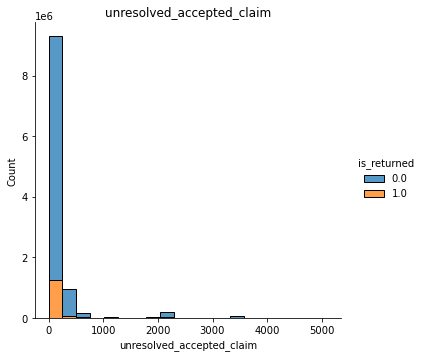

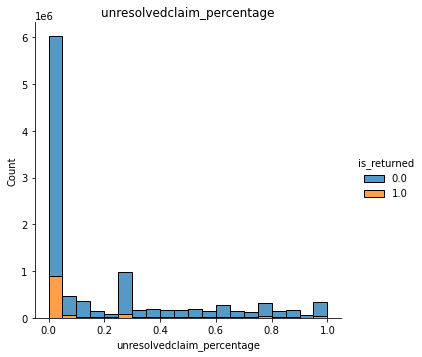

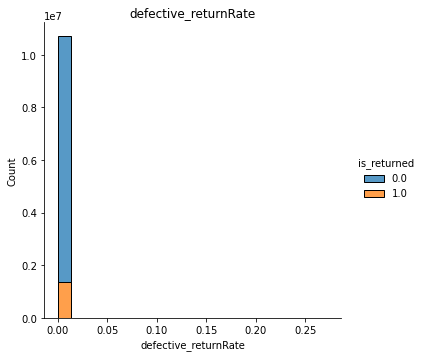

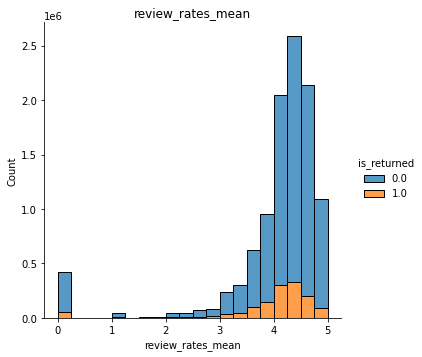

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7feaea31bee0> (for post_execute):


KeyboardInterrupt: 

In [19]:
for feature in continuous_feature:
    data=df.copy()
    sns.displot(data=df, x=data[feature], hue="is_returned",  multiple="stack", bins=20)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

<AxesSubplot:title={'center':'All Data Correlation'}>

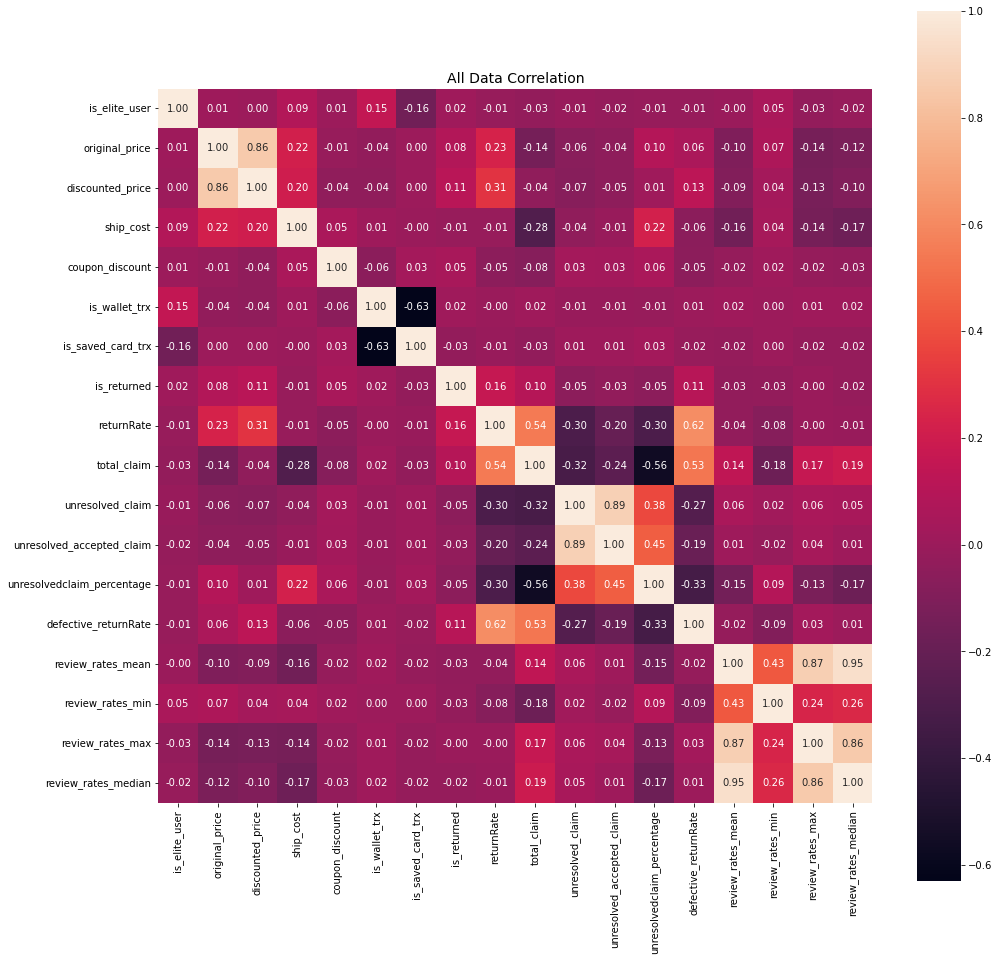

In [20]:
dataCorr = df.corr()
plt.figure(figsize=(16,16))
plt.title('All Data Correlation', fontsize=14)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True)

array([[<AxesSubplot:title={'center':'is_elite_user'}>,
        <AxesSubplot:title={'center':'original_price'}>,
        <AxesSubplot:title={'center':'discounted_price'}>],
       [<AxesSubplot:title={'center':'ship_cost'}>,
        <AxesSubplot:title={'center':'coupon_discount'}>,
        <AxesSubplot:title={'center':'is_wallet_trx'}>],
       [<AxesSubplot:title={'center':'is_saved_card_trx'}>,
        <AxesSubplot:title={'center':'is_returned'}>,
        <AxesSubplot:title={'center':'returnRate'}>],
       [<AxesSubplot:title={'center':'total_claim'}>,
        <AxesSubplot:title={'center':'unresolved_claim'}>,
        <AxesSubplot:title={'center':'unresolved_accepted_claim'}>],
       [<AxesSubplot:title={'center':'unresolvedclaim_percentage'}>,
        <AxesSubplot:title={'center':'defective_returnRate'}>,
        <AxesSubplot:title={'center':'review_rates_mean'}>],
       [<AxesSubplot:title={'center':'review_rates_min'}>,
        <AxesSubplot:title={'center':'review_rates_max'}>,

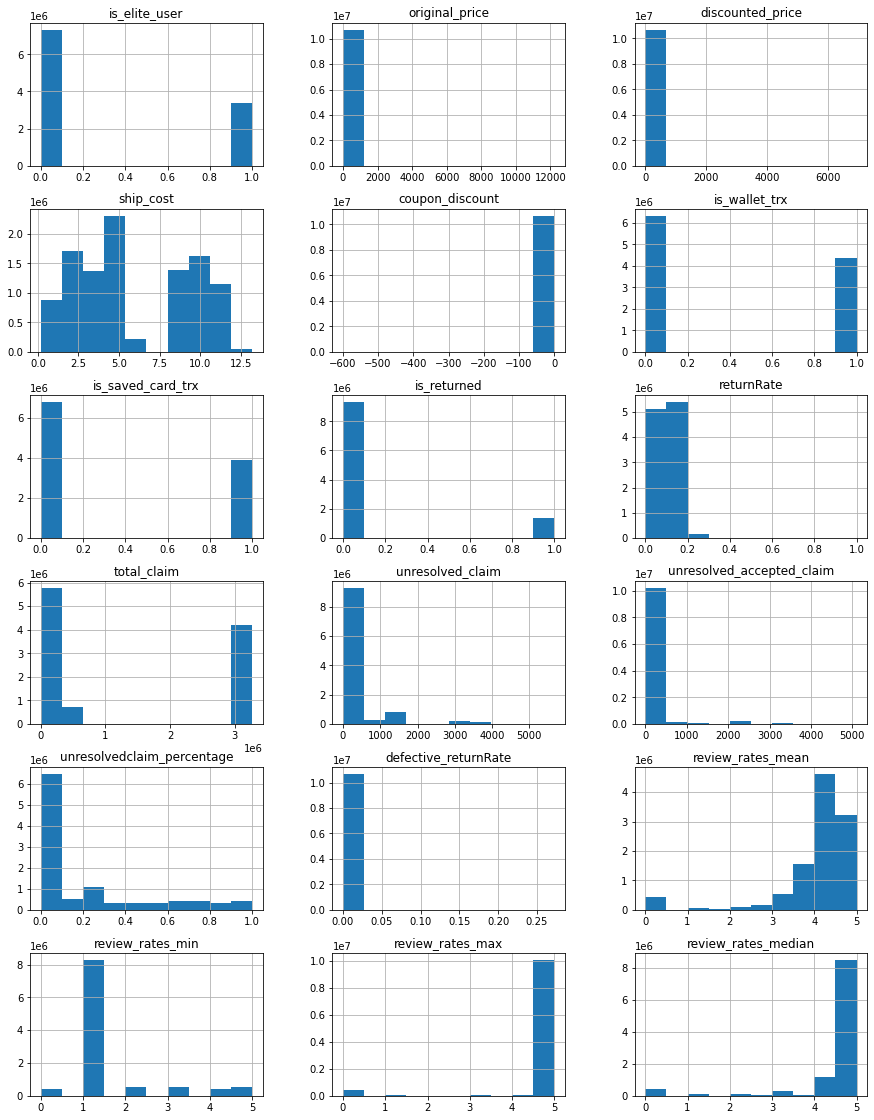

In [21]:
df.hist(figsize=(15,30),layout=(9,3))

In [22]:
df.corr()['is_returned']

is_elite_user                 0.017137
original_price                0.084404
discounted_price              0.109691
ship_cost                    -0.013114
coupon_discount               0.051436
is_wallet_trx                 0.018638
is_saved_card_trx            -0.025212
is_returned                   1.000000
returnRate                    0.161412
total_claim                   0.097626
unresolved_claim             -0.051001
unresolved_accepted_claim    -0.033358
unresolvedclaim_percentage   -0.053733
defective_returnRate          0.105484
review_rates_mean            -0.033363
review_rates_min             -0.031077
review_rates_max             -0.000058
review_rates_median          -0.022323
Name: is_returned, dtype: float64

## En çok iade edilen ürünlerin incelenmesi

In [23]:
#en çok return edilen ürün
df.groupby("product_name")["is_returned"].sum().sort_values(ascending = False)

product_name
Siyah Erkek Oversize Bisiklet Yaka Baskılı Kısa Kollu T-Shirt TMNSS21TS1223    2664.0
Mavi Yırtık Detaylı Yüksek Bel Wide Leg Jeans TWOAW21JE0539                    2098.0
Mavi Bel Detaylı Yüksek Bel 90's Wide Leg Jeans TWOSS21JE0385                  2040.0
Mavi Renk Bloklu Denim Şort TWOSS21SR0435                                      2037.0
Ekru Yüksek Bel Mom Jeans TWOSS20JE0200                                        2036.0
                                                                                ...  
Kadın Bordo Transparan Kemer Detaylı Fantezi Yüksek Bel Külot                     0.0
Kadın Bordo Torba Cepli Empirme Otantik Elbise                                    0.0
Kadın Bordo Toparlayıcı İnceltici Ekstra Yüksek Bel Tayt Korse                    0.0
Kadın Bordo Toparlayıcı Yüksek Bel Bikini Takım                                   0.0
Kadın Lacivert Yakası Pileli Puantiye Desenli Bluz                                0.0
Name: is_returned, Length: 561321, dtype:

In [24]:
#en çok return edilen kategori
df.groupby("category_name")["is_returned"].sum().sort_values(ascending = False)

category_name
Şort & Bermuda                  inf
Bluz                            inf
T-Shirt                         inf
Pantolon                        inf
Jeans                           inf
                               ... 
Büyük Beden Pijama Üstü         0.0
Bebek & Aktivite Oyuncakları    0.0
Hamile Çorabı                   0.0
Tesettür Body                   0.0
Fantezi Atlet                   0.0
Name: is_returned, Length: 196, dtype: float16

In [25]:
#en çok return edilen kategori
cat_ret_ratio = df.groupby(["category_name"])["is_returned"].sum().sort_index() / df.groupby(["category_name"])["is_returned"].count().sort_index()
cat_ret_ratio.sort_values(ascending= False)

category_name
Şort & Bermuda                  inf
Bluz                            inf
T-Shirt                         inf
Pantolon                        inf
Jeans                           inf
                               ... 
Fantezi Atlet                   0.0
Tıraş Sonrası Ürün              0.0
Hamile Çorabı                   0.0
Büyük Beden Pijama Üstü         0.0
Bebek & Aktivite Oyuncakları    0.0
Name: is_returned, Length: 196, dtype: float64

In [26]:
#en çok return edilen marka
df.groupby("brand_name")["is_returned"].sum().sort_values(ascending = False)

brand_name
TRENDYOLMİLLA         inf
TRENDYOL MAN      62720.0
DeFacto           54336.0
Koton             42560.0
Happiness İst.    31104.0
                   ...   
MİNİLİNA              0.0
MİNİMOD               0.0
MİNİSEF               0.0
Bebeemm               0.0
PIRLANTA              0.0
Name: is_returned, Length: 21238, dtype: float16

In [27]:
#en çok return edilen renk
df.groupby("color_name")["is_returned"].sum().sort_values(ascending = False)

color_name
Lacivert          inf
Beyaz             inf
Siyah             inf
Pembe             inf
Gri               inf
Mavi              inf
Bej           62816.0
Yeşil         59616.0
Ekru          59232.0
Mor           54208.0
Kahverengi    45632.0
Kırmızı       42816.0
Turuncu       31216.0
Haki          27936.0
Sarı          24944.0
Bordo         18800.0
Turkuaz        5800.0
Gümüş          2452.0
Metalik        1562.0
Altın           814.0
Name: is_returned, dtype: float16

In [28]:
#en çok return edilen renk oran
brand_ret_ratio = df.groupby(["color_name"])["is_returned"].sum().sort_index() / df.groupby(["color_name"])["is_returned"].count().sort_index()
brand_ret_ratio.sort_values(ascending= False)

color_name
Lacivert           inf
Beyaz              inf
Gri                inf
Siyah              inf
Pembe              inf
Mavi               inf
Metalik       0.172998
Ekru          0.152210
Haki          0.141485
Bordo         0.137590
Mor           0.137217
Kahverengi    0.135815
Kırmızı       0.133747
Yeşil         0.133465
Turuncu       0.133099
Altın         0.128574
Bej           0.127752
Gümüş         0.118966
Sarı          0.104993
Turkuaz       0.094646
Name: is_returned, dtype: float64

In [29]:
#total_claim
df.groupby("total_claim")["is_returned"].sum().sort_values(ascending = False)

total_claim
3269293        inf
328876     54272.0
116356     27424.0
170200     27264.0
170178     21808.0
            ...   
1278           0.0
1299           0.0
6849           0.0
6522           0.0
6488           0.0
Name: is_returned, Length: 1622, dtype: float16

In [30]:
#unresolved_accepted_claim
df.groupby("unresolved_accepted_claim")["is_returned"].sum().sort_values(ascending = False)

unresolved_accepted_claim
0          inf
443    54272.0
2      40160.0
8      29808.0
52     22704.0
        ...   
416        0.0
200        0.0
301        0.0
866        0.0
169        0.0
Name: is_returned, Length: 320, dtype: float16

In [31]:
#unresolved_accepted_claim oran
claim_ret_ratio = df.groupby(["unresolved_accepted_claim"])["is_returned"].sum().sort_index() / df.groupby(["unresolved_accepted_claim"])["is_returned"].count().sort_index()
claim_ret_ratio.sort_values(ascending= False)

unresolved_accepted_claim
0            inf
328     1.000000
1984    0.500000
213     0.443931
943     0.400000
          ...   
326     0.000000
323     0.000000
321     0.000000
1048    0.000000
351     0.000000
Name: is_returned, Length: 320, dtype: float64

In [32]:
#unresolvedclaim_percentage
df.groupby("unresolvedclaim_percentage")["is_returned"].sum().sort_values(ascending = False)

unresolvedclaim_percentage
0.000000        inf
0.264404    54272.0
0.046509    27264.0
0.122925    21808.0
0.097534    20352.0
             ...   
0.612305        0.0
0.951172        0.0
0.480713        0.0
0.922363        0.0
0.897461        0.0
Name: is_returned, Length: 998, dtype: float16

## Price incelemesi

In [33]:
print('original_price mean:', df["original_price"].mean())
print('original_price max:' , df["original_price"].max())
print('original_price min:' , df["original_price"].min())

original_price mean: nan
original_price max: 12220.0
original_price min: 0.0


In [34]:
#product name
df.groupby(["product_name"])["original_price"].sum().sort_index()

product_name
!!!!!!!!!!!!!!!!!!denim Kot Etekli Kokoş Kombin                 290.0000
!!!!!!!!!!!!!!!!kazayağı Fırsat Ürünü Salopet Takım 3 Parça     189.0000
!!!!!!!!!!!!!!!ekose 4 Parça Komple Set                         265.0000
!!!!!!!!!!!!bayramlık Tarz Ispanyol Takım                      2015.0000
!!!!!!!!!!!!pitikare Elbise Ve Bandana                          570.0000
                                                                 ...    
“art” Elbise                                                    378.0000
“hell Was Boring” Oversize Unisex T-shirt Beyaz                  69.8750
“we Think Like One” T-shirt                                     520.0000
• Çocuk Unisex Elsa Desenli Dijital Baskılı Çorap                69.8125
€i‡ek Desenli Keten Elbise                                     3700.0000
Name: original_price, Length: 561321, dtype: float16

In [35]:
#category name
df.groupby(["category_name"])["original_price"].sum().sort_values(ascending = False)

category_name
Abiye & Mezuniyet Elbisesi            inf
Parka                                 inf
Mayo                                  inf
Mayokini                              inf
Mont                                  inf
                                  ...    
Büyük Beden Pijama Üstü         275.00000
Tesettür Tayt                   236.25000
Diyabetik Çorap                 159.00000
Bebek & Aktivite Oyuncakları    109.75000
Tıraş Sonrası Ürün               46.90625
Name: original_price, Length: 196, dtype: float16

In [36]:
#brand name
df.groupby(["brand_name"])["original_price"].sum().sort_index()

brand_name
01Atelier            150.0
032C                7020.0
1 Ekim                99.0
1 dünyam              34.0
10 Crosby            378.5
                     ...  
şura cocuk gıyım     235.0
şuranur              540.0
şuşunun gardrobu     150.0
şüşü collection     9248.0
şımarık kids           inf
Name: original_price, Length: 21238, dtype: float16

In [37]:
#color price
df.groupby(["color_name"])["original_price"].sum().sort_index()

color_name
Altın         inf
Bej           inf
Beyaz         inf
Bordo         inf
Ekru          inf
Gri           inf
Gümüş         inf
Haki          inf
Kahverengi    inf
Kırmızı       inf
Lacivert      inf
Mavi          inf
Metalik       inf
Mor           inf
Pembe         inf
Sarı          inf
Siyah         inf
Turkuaz       inf
Turuncu       inf
Yeşil         inf
Name: original_price, dtype: float16

### Ship Cost İncelemesi

In [38]:
print('ship_cost mean:', df.ship_cost.mean())
print('ship_cost max:' , df.ship_cost.max())
print('ship_cost min:' , df.ship_cost.min())

ship_cost mean: nan
ship_cost max: 13.2
ship_cost min: 0.1776


In [40]:
dff = df.sample(n=1000, random_state=0)

In [41]:
dff.groupby(["product_name", "ship_cost"])["is_returned"].sum().sort_values(ascending = False)

product_name                                                                    ship_cost
Siyah Fırfır Detaylı Volanlı Elbise TWOSS21EL1329                               1.547852     1.0
Erkek Çocuk Lacivert Bermuda Dokuma Şort                                        2.220703     1.0
Yeşil Üçgen Bikini Üstü TBESS21BU0085                                           4.699219     1.0
Kadın Gri Kontrastlı Mayo                                                       8.882812     1.0
Coool Beli Lastikli Relax Fit Mini Şort                                         8.882812     1.0
                                                                                            ... 
Kadın  Koyu Gri  Fun For Living Baskılı Örme Kısa Kollu Bisiklet Yakalı Tshirt  1.023438     0.0
                                                                                1.030273     0.0
                                                                                1.044922     0.0
                                     

In [42]:
dff.groupby(["category_name", "ship_cost"])["is_returned"].sum().sort_values(ascending = False)

category_name   ship_cost
Elbise          9.398438     8.0
Jeans           4.699219     4.0
Elbise          4.699219     4.0
Şort & Bermuda  9.398438     3.0
T-Shirt         3.132812     2.0
                            ... 
Fantezi String  2.476562     0.0
                2.349609     0.0
                2.314453     0.0
                2.265625     0.0
Şort & Bermuda  13.203125    0.0
Name: is_returned, Length: 21560, dtype: float16

In [43]:
dff.groupby(["brand_name", "ship_cost"])["is_returned"].sum().sort_values(ascending = False)

brand_name           ship_cost
TRENDYOLMİLLA        4.699219     17.0
                     9.398438     13.0
                     1.342773      3.0
Trend Alaçatı Stili  9.398438      2.0
Olalook              9.398438      2.0
                                  ... 
HOLYTUNE             1.450195      0.0
                     1.416016      0.0
                     1.377930      0.0
                     1.342773      0.0
şımarık kids         13.203125     0.0
Name: is_returned, Length: 2336180, dtype: float16

In [44]:
dff.groupby(["color_name", "ship_cost"])["is_returned"].sum().sort_values(ascending = False)

color_name  ship_cost
Siyah       8.882812     5.0
            4.699219     5.0
Pembe       4.699219     4.0
Siyah       9.398438     3.0
Mavi        4.441406     3.0
                        ... 
Gümüş       3.556641     0.0
            3.496094     0.0
            3.429688     0.0
            3.302734     0.0
Yeşil       13.203125    0.0
Name: is_returned, Length: 2200, dtype: float16

### İndirim

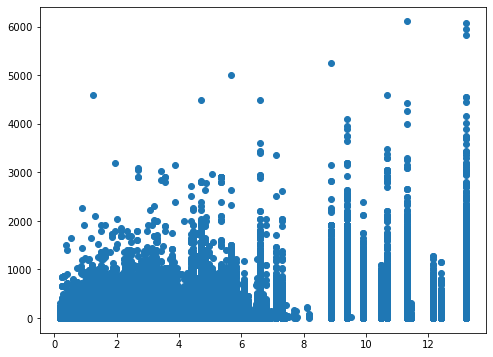

In [45]:
df["discount"] = df["original_price"] - df["discounted_price"]


plt.figure(figsize=(8, 6))
plt.scatter(df["ship_cost"], df["discount"])

(0.0, 1.0942010294423086)

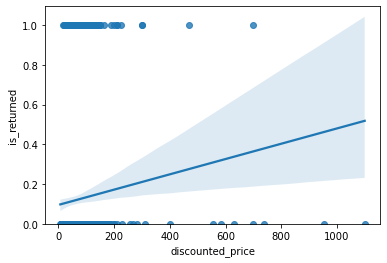

In [46]:
sns.regplot(x="discounted_price", y="is_returned", data=dff)
plt.ylim(0,)

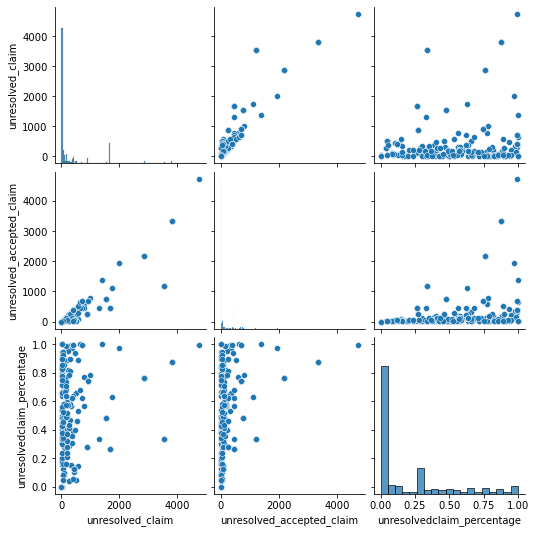

In [47]:
sns.pairplot(data = dff, vars=['unresolved_claim', 'unresolved_accepted_claim', 'unresolvedclaim_percentage'])
plt.show()

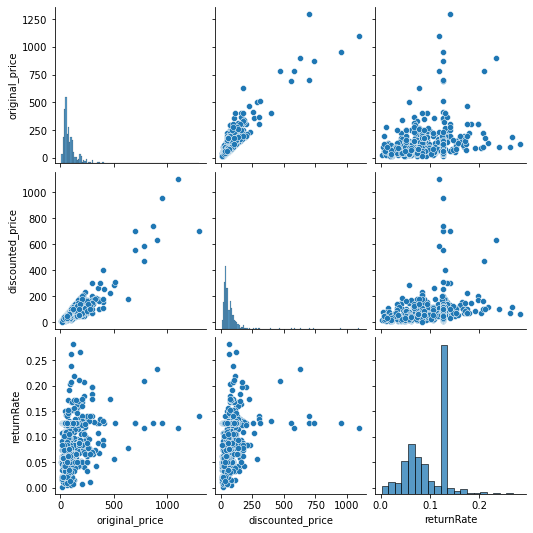

In [48]:
sns.pairplot(data = dff, vars=['original_price', 'discounted_price', 'returnRate'])
plt.show()

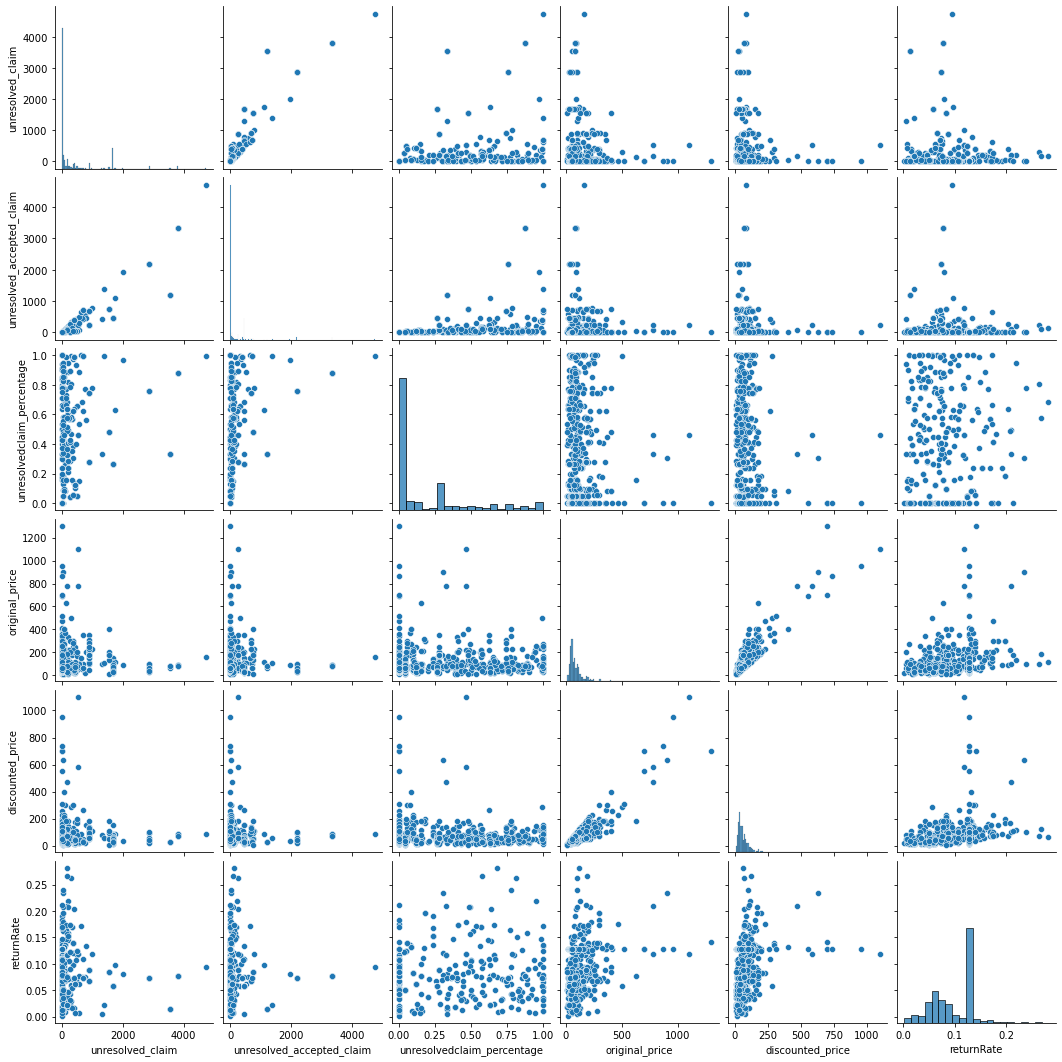

In [49]:
sns.pairplot(data = dff, vars=['unresolved_claim', 'unresolved_accepted_claim', 'unresolvedclaim_percentage', 'original_price', 'discounted_price', 'returnRate'])
plt.show()

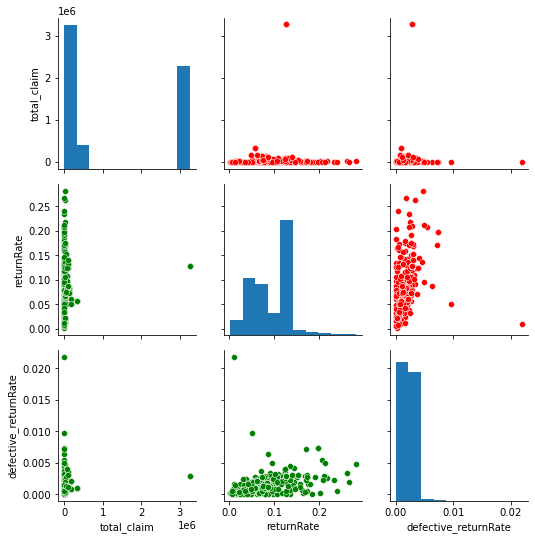

In [50]:
#renkli g.map num_1

g=sns.PairGrid(data = dff, vars=['total_claim', 'returnRate', 'defective_returnRate'])
g.map_upper(sns.scatterplot,color='red')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist)

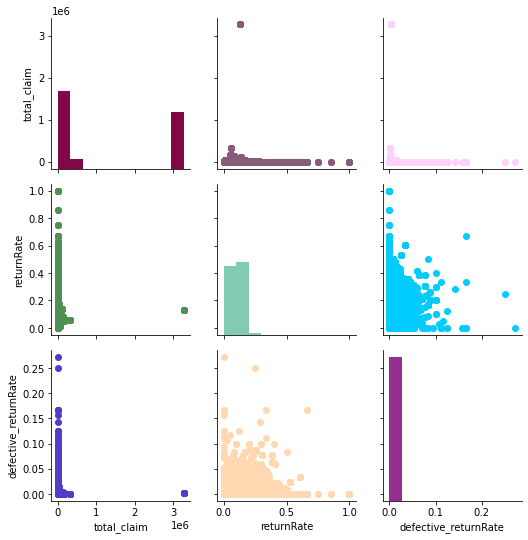

In [51]:
#renkli g.map num_2

colors = iter(['xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue'])

def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    plt.hist(x, **kwargs)

    
g=sns.PairGrid(data = df, vars=['total_claim', 'returnRate', 'defective_returnRate'])
g.map_diag(my_hist)
g.map_offdiag(my_scatter)